<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

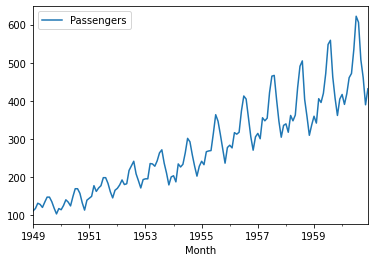

In [85]:
import pandas as pd
from matplotlib import pyplot
ap=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',index_col='Month',
                      parse_dates=True)
ap.plot()
pyplot.show()

In [86]:
ap

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [27]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

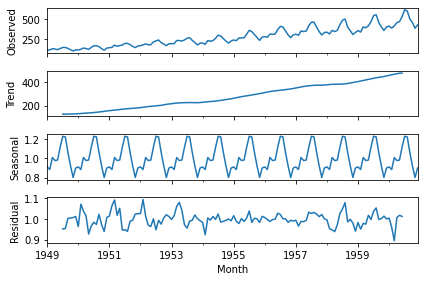

In [67]:

decompose_result = seasonal_decompose(ap['Passengers'],model='multiplicative')
decompose_result.plot();

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


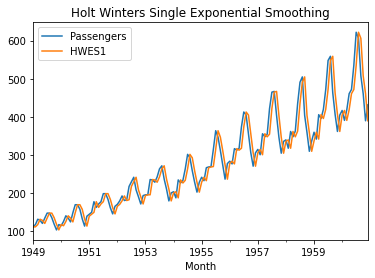

In [68]:
# Set the frequency of the date time index as Monthly start as indicated by the data

# Set the value of Alpha and define m (Time Period)
m = 1
alpha = 1/(2*m)
ap['HWES1'] = SimpleExpSmoothing(ap['Passengers']).fit().fittedvalues
ap[['Passengers','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


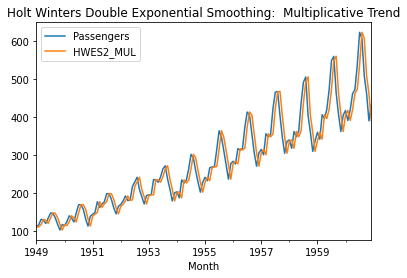

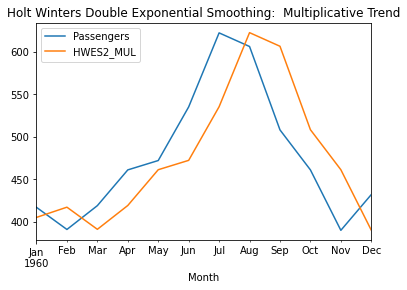

In [69]:

ap['HWES2_MUL'] = ExponentialSmoothing(ap['Passengers'],trend='mul').fit().fittedvalues
ap[['Passengers','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing:  Multiplicative Trend')
ap[['Passengers','HWES2_MUL']][-12:].plot(title='Holt Winters Double Exponential Smoothing:  Multiplicative Trend')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


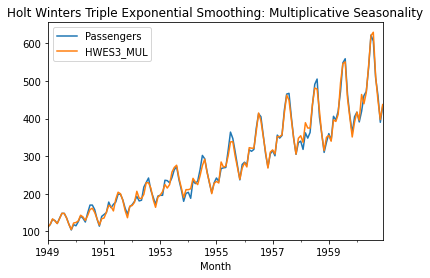

In [70]:
ap['HWES3_MUL'] = ExponentialSmoothing(ap['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
ap[['Passengers','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Multiplicative Seasonality');

TRAIN and TEST

In [129]:

ap.index.freq = 'MS'
train = ap[:114]
test = ap[114:]
print("Full data shape is "+ str(ap.shape))
print("Train data shape is "+ str(train.shape))
print("Test data shape is "+ str(test.shape))

Full data shape is (144, 1)
Train data shape is (114, 1)
Test data shape is (30, 1)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

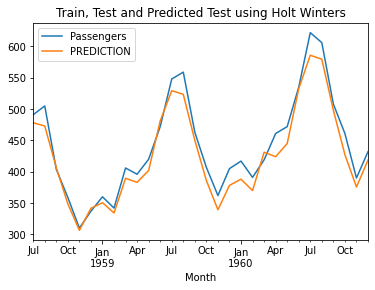

In [140]:
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit().forecast(30).rename('HW')
#train['Passengers'].plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [141]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_predictions)}')

Mean Absolute Error = 17.97410163429237
Mean Squared Error = 430.4047016321292


In [142]:
def evalmetric(y,ypred):
 import numpy as np
 e = y - ypred 
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 r2_f = 1-(sum(e**2)/sum((y-np.mean(y))**2))
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", r2_f)

In [147]:
evalmetric(test,pd.DataFrame(test_predictions))

TypeError: ignored

,HW
1958-07-01,478.231411
1958-08-01,473.015148
1958-09-01,406.608358
1958-10-01,348.764834
1958-11-01,306.516332
1958-12-01,341.706208
1959-01-01,350.635828
1959-02-01,334.195424
1959-03-01,389.559540
1959-04-01,383.048402
